In [1]:
from keras import layers, models, optimizers
from keras import datasets
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [2]:
K.set_image_data_format('channels_first')
print(K.image_data_format())

channels_first


In [0]:
class GAN(models.Sequential):
  def __init__(self, input_dim):
    super().__init__()
    
    self.input_dim = input_dim
    
    self.generator = self.make_G()
    self.discriminator = self.make_D()
    
    self.add(self.generator)
    self.discriminator.trainable = False
    self.add(self.discriminator)
    
    self.compile_all()
    
  def make_G(self):
    input_dim = self.input_dim
    
    model = models.Sequential()
    model.add(layers.Dense(1024, activation='tanh', input_dim=input_dim))
    model.add(layers.Dense(128 * 7 * 7, activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.Reshape((128, 7, 7), input_shape=(128 * 7 * 7,)))
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation='tanh'))
    model.add(layers.UpSampling2D(size=(2, 2)))
    model.add(layers.Conv2D(1, (5, 5), padding='same', activation='tanh'))
    return model
  
  def make_D(self):
    model = models.Sequential()
    model.add(layers.Conv2D(64, (5, 5), padding='same', activation='tanh',
                           input_shape=(1, 28, 28)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(128, (5, 5), padding='same', activation='tanh'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model
  
  def compile_all(self):
    opt_D = optimizers.SGD(lr=0.0005, momentum=0.9, nesterov=True)
    opt_G = optimizers.SGD(lr=0.0005, momentum=0.9, nesterov=True)
    
    self.compile(loss='binary_crossentropy', optimizer=opt_G)
    
    self.discriminator.trainable = True
    self.discriminator.compile(loss='binary_crossentropy', optimizer=opt_D)
    
  def get_z(self, ln):
    return np.random.uniform(-1.0, 1.0, (ln, self.input_dim))
  
  def train_once(self, x):
    ln = x.shape[0]
    
    z = self.get_z(ln)
    gen = self.generator.predict(z, verbose=0)
    input_D = np.concatenate((x, gen))
    y_D = [1] * ln + [0] * ln
    loss_D = self.discriminator.train_on_batch(input_D, y_D)
    
    z = self.get_z(ln)
    self.discriminator.trainable = False
    loss_G = self.train_on_batch(z, [1] * ln)
    self.discriminator.trainable = True
    
    return loss_D, loss_G
  



In [0]:
def get_x(x_train, index, batch_size):
  return x_train[index * batch_size:(index + 1) * batch_size]



In [0]:
class MnistData():
    def __init__(self):
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
 
        img_rows, img_cols = x_train.shape[1:]
 
        x_train = x_train.astype('float32') - 127.5
        x_test = x_test.astype('float32') - 127.5
        x_train /= 127.5
        x_test /= 127.5
 
        self.num_classes = 10
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test



In [0]:
def main():
  batch_size = 100
  epochs = 100
  input_dim = 100
  sample_size = 6
  
  data = MnistData()
  x_train = data.x_train
  x_train = x_train.reshape((x_train.shape[0], 1) + x_train.shape[1:])
  
  gan = GAN(input_dim)
  
  for epoch in range(epochs):
    print("Epoch", epoch)
    
    for index in range(int(x_train.shape[0] / batch_size)):
      x = get_x(x_train, index, batch_size)
      loss_D, loss_G = gan.train_once(x)
      
    print('Loss D:', loss_D)
    print('Loss G:', loss_G)
      
    if epoch % 2 == 0 or epoch == epochs - 1:
      z = gan.get_z(sample_size)
      gen = gan.generator.predict(z, verbose=0)
      
      plt.figure(figsize=(20, 2))
  
      for i in range(sample_size):
        ax = plt.subplot(1, sample_size, i + 1)
        plt.imshow(gen[i].reshape((28, 28)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
      plt.show()   
      



11493376/11490434 [==============================] - 2s 0us/step
Epoch 0
Loss D: 0.6381008
Loss G: 1.0587254


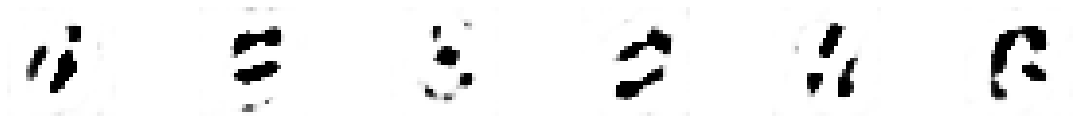

Epoch 1
Loss D: 0.47613448
Loss G: 1.1097356
Epoch 2
Loss D: 0.46451092
Loss G: 1.5728028


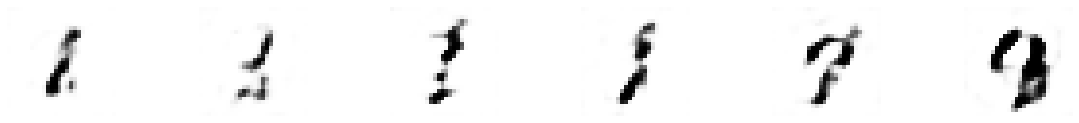

Epoch 3
Loss D: 0.30881077
Loss G: 2.2170916
Epoch 4
Loss D: 0.3044123
Loss G: 2.3362854


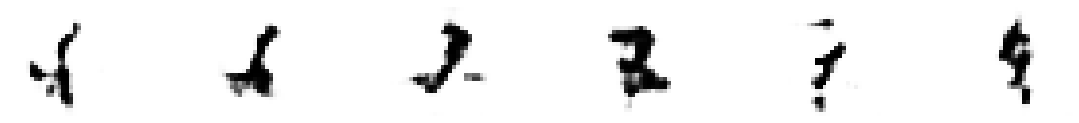

Epoch 5
Loss D: 0.37273207
Loss G: 2.4693162
Epoch 6
Loss D: 0.29151562
Loss G: 2.080222


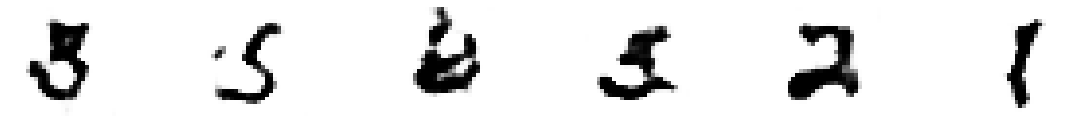

Epoch 7
Loss D: 0.4502313
Loss G: 2.2387092
Epoch 8
Loss D: 0.48229066
Loss G: 1.8406763


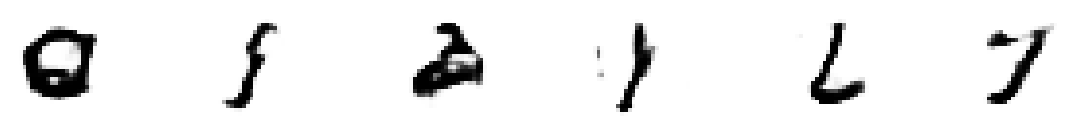

Epoch 9
Loss D: 0.39309102
Loss G: 2.3732703
Epoch 10
Loss D: 0.35071698
Loss G: 2.2195754


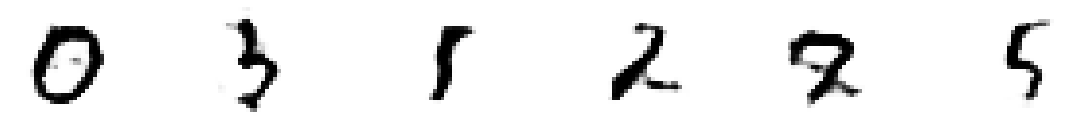

Epoch 11
Loss D: 0.30549318
Loss G: 2.2789457
Epoch 12
Loss D: 0.3579612
Loss G: 1.9032582


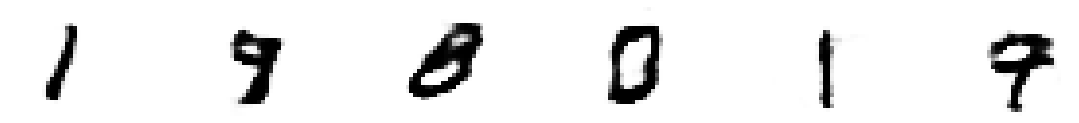

Epoch 13
Loss D: 0.3049699
Loss G: 2.2228768
Epoch 14
Loss D: 0.26214415
Loss G: 2.5363374


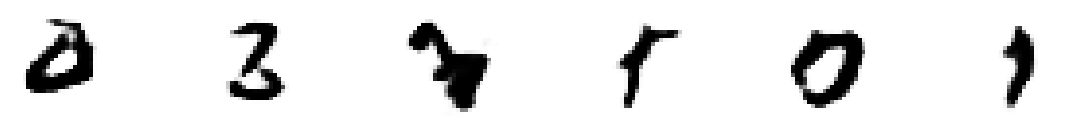

Epoch 15
Loss D: 0.3784493
Loss G: 1.6311625
Epoch 16
Loss D: 0.25761947
Loss G: 2.173492


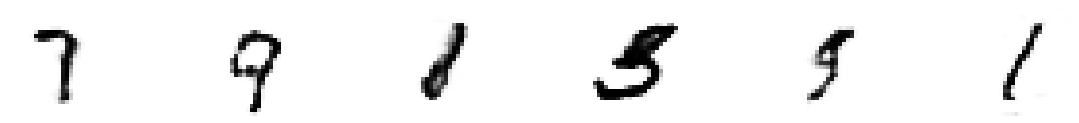

Epoch 17
Loss D: 0.30130747
Loss G: 3.0371015
Epoch 18
Loss D: 0.23540223
Loss G: 2.1578755


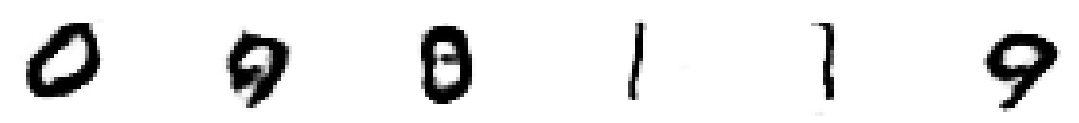

Epoch 19
Loss D: 0.26959175
Loss G: 2.7145014
Epoch 20
Loss D: 0.3549814
Loss G: 1.4752232


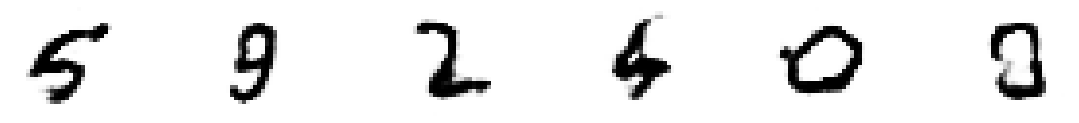

Epoch 21
Loss D: 0.2956773
Loss G: 3.4116294
Epoch 22
Loss D: 0.31425932
Loss G: 1.879843


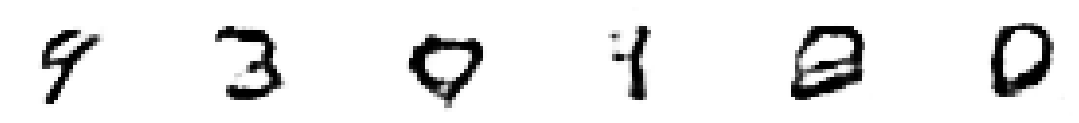

Epoch 23
Loss D: 0.25132966
Loss G: 2.5722811
Epoch 24
Loss D: 0.23792411
Loss G: 2.9249053


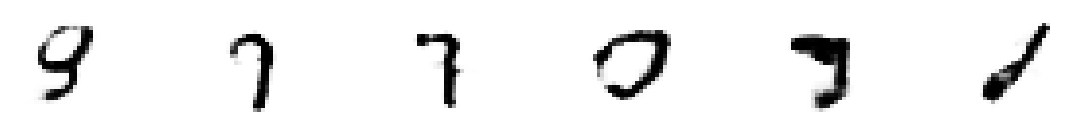

Epoch 25
Loss D: 0.2696135
Loss G: 1.7258147
Epoch 26
Loss D: 0.17108153
Loss G: 3.1437106


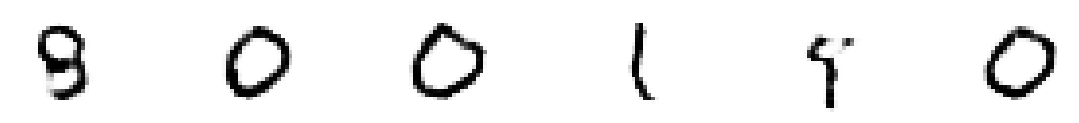

Epoch 27
Loss D: 0.22096151
Loss G: 2.544888
Epoch 28
Loss D: 0.23495454
Loss G: 3.3649018


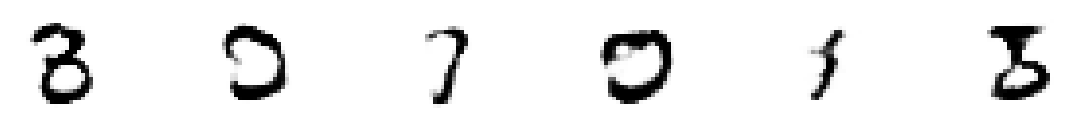

Epoch 29
Loss D: 0.35827553
Loss G: 2.417882
Epoch 30
Loss D: 0.2548189
Loss G: 3.4083996


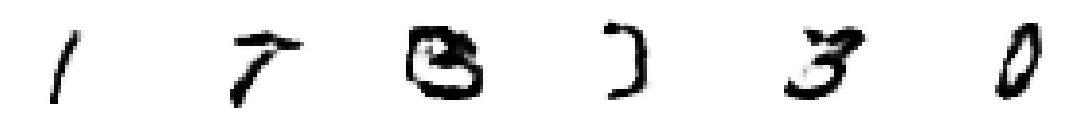

Epoch 31
Loss D: 0.24325065
Loss G: 2.3709981
Epoch 32
Loss D: 0.22891435
Loss G: 2.5530524


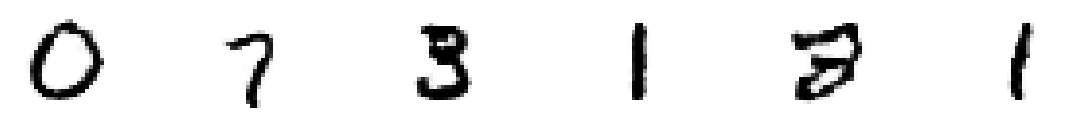

Epoch 33
Loss D: 0.1764557
Loss G: 2.5471745
Epoch 34
Loss D: 0.19924864
Loss G: 2.63378


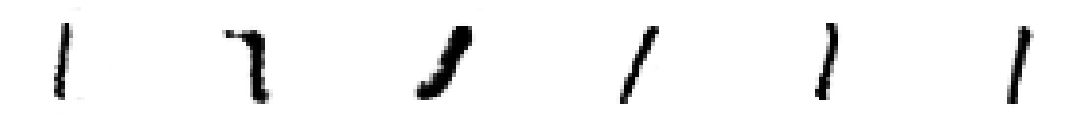

Epoch 35
Loss D: 0.22246063
Loss G: 3.0488462
Epoch 36
Loss D: 0.19152416
Loss G: 2.9332898


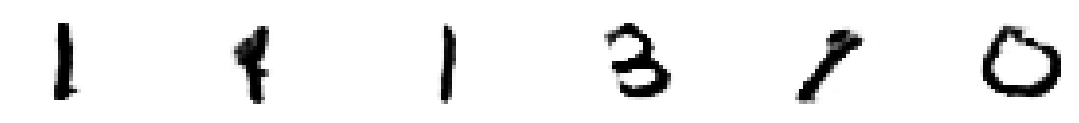

Epoch 37
Loss D: 0.22350673
Loss G: 3.0174928
Epoch 38
Loss D: 0.22066696
Loss G: 2.6900427


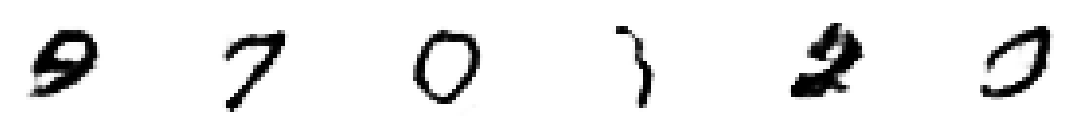

Epoch 39
Loss D: 0.29604146
Loss G: 3.1129544
Epoch 40
Loss D: 0.23504694
Loss G: 2.4025505


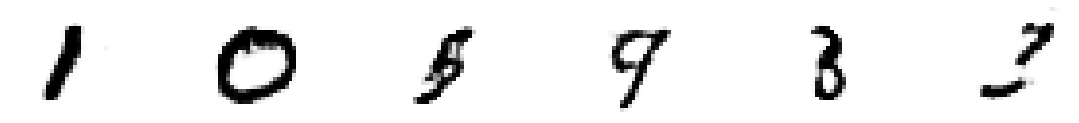

Epoch 41
Loss D: 0.22394842
Loss G: 2.424251
Epoch 42
Loss D: 0.25995144
Loss G: 2.543316


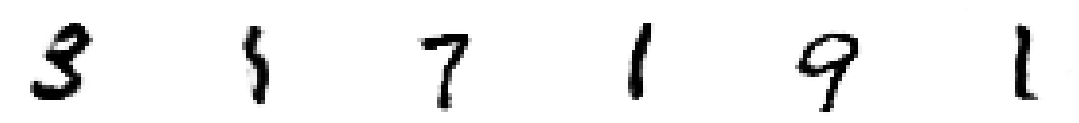

Epoch 43
Loss D: 0.2140265
Loss G: 2.1707902
Epoch 44
Loss D: 0.25697997
Loss G: 2.328179


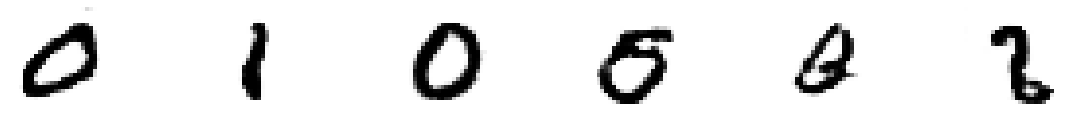

Epoch 45
Loss D: 0.2758466
Loss G: 2.8301399
Epoch 46
Loss D: 0.21184838
Loss G: 2.7715726


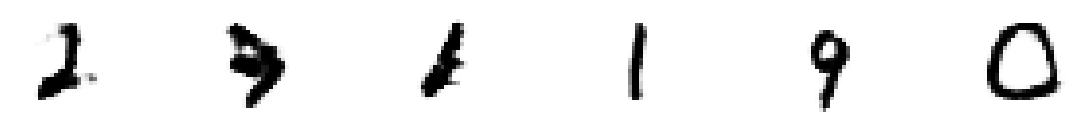

Epoch 47
Loss D: 0.25615177
Loss G: 2.380788
Epoch 48
Loss D: 0.24416454
Loss G: 2.8521564


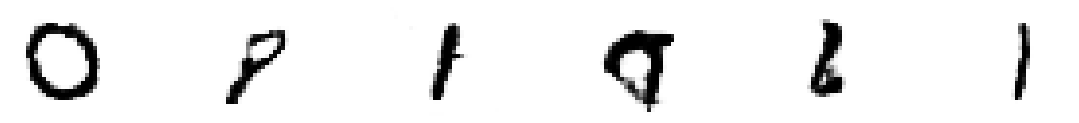

Epoch 49
Loss D: 0.19978385
Loss G: 2.4990056
Epoch 50
Loss D: 0.19692993
Loss G: 2.5445497


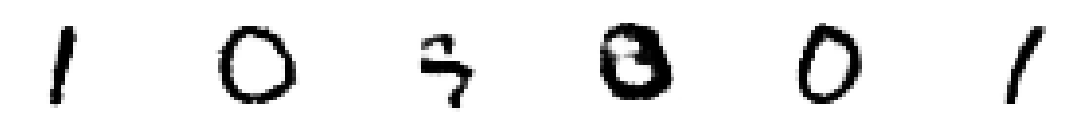

Epoch 51
Loss D: 0.24433206
Loss G: 2.759587
Epoch 52
Loss D: 0.2715051
Loss G: 2.7182956


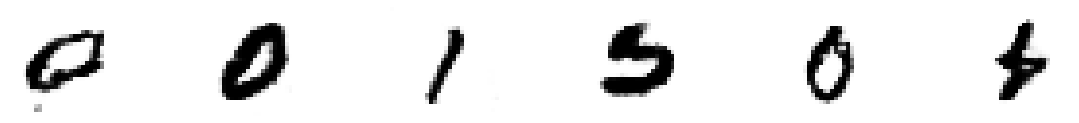

Epoch 53
Loss D: 0.24901097
Loss G: 2.2315726
Epoch 54
Loss D: 0.21236397
Loss G: 2.441111


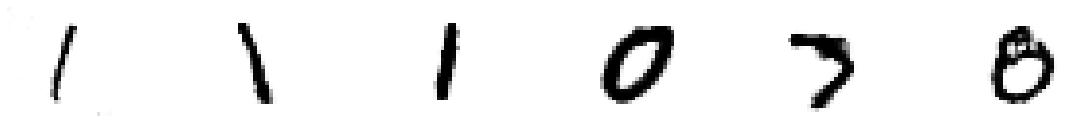

Epoch 55
Loss D: 0.24224007
Loss G: 2.1856647
Epoch 56
Loss D: 0.22280753
Loss G: 2.1698053


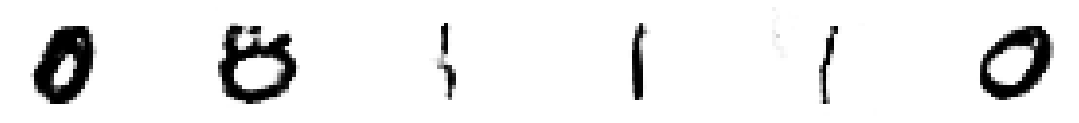

Epoch 57
Loss D: 0.27582893
Loss G: 2.9877977
Epoch 58
Loss D: 0.19196114
Loss G: 2.3155537


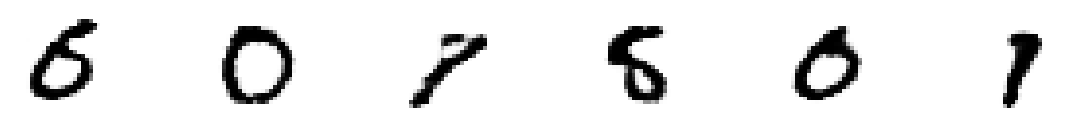

Epoch 59
Loss D: 0.21630695
Loss G: 2.404871
Epoch 60
Loss D: 0.17297526
Loss G: 2.4545197


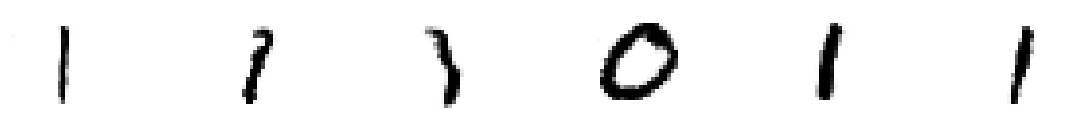

Epoch 61
Loss D: 0.20846081
Loss G: 2.2388043
Epoch 62
Loss D: 0.20098647
Loss G: 2.656733


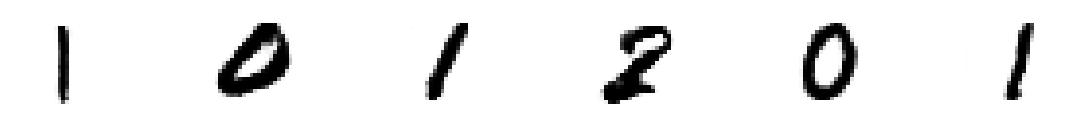

Epoch 63
Loss D: 0.2366491
Loss G: 2.690953
Epoch 64
Loss D: 0.18454075
Loss G: 2.393112


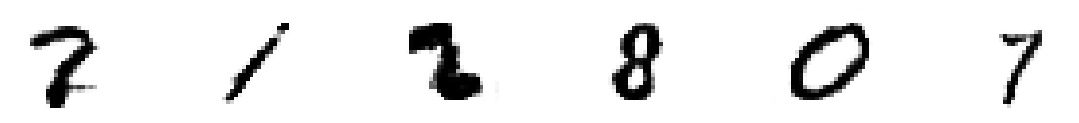

Epoch 65
Loss D: 0.19321129
Loss G: 2.8245862
Epoch 66
Loss D: 0.20268428
Loss G: 2.3529615


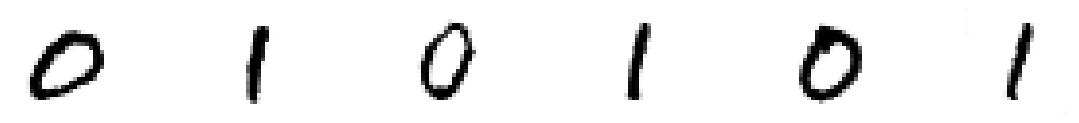

Epoch 67
Loss D: 0.24269724
Loss G: 2.8910084
Epoch 68
Loss D: 0.19559975
Loss G: 2.8556104


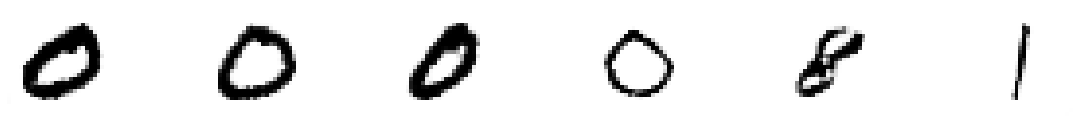

Epoch 69
Loss D: 0.19378044
Loss G: 2.933969
Epoch 70
Loss D: 0.22268158
Loss G: 3.0762641


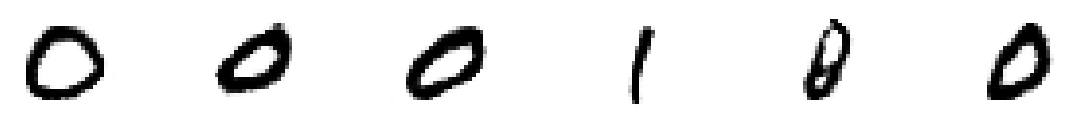

Epoch 71
Loss D: 0.17559795
Loss G: 2.8000185
Epoch 72
Loss D: 0.167633
Loss G: 2.985731


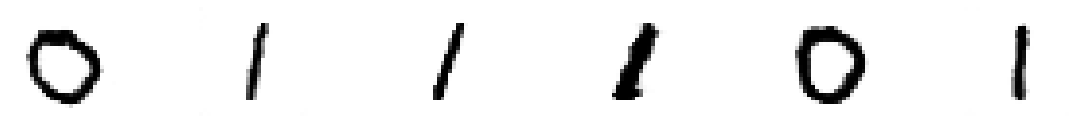

Epoch 73
Loss D: 0.17886153
Loss G: 2.5692651
Epoch 74
Loss D: 0.18732433
Loss G: 2.7211707


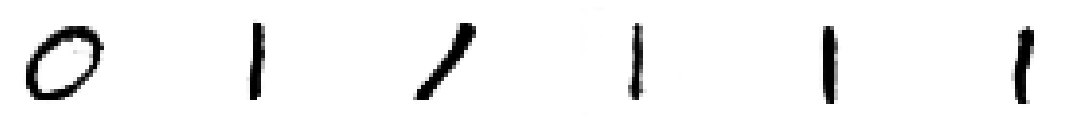

Epoch 75
Loss D: 0.22509794
Loss G: 3.1629822
Epoch 76
Loss D: 0.18632996
Loss G: 2.8910797


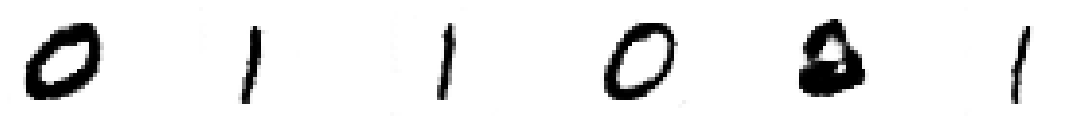

Epoch 77
Loss D: 0.22936223
Loss G: 2.836073
Epoch 78
Loss D: 0.16051471
Loss G: 3.1173663


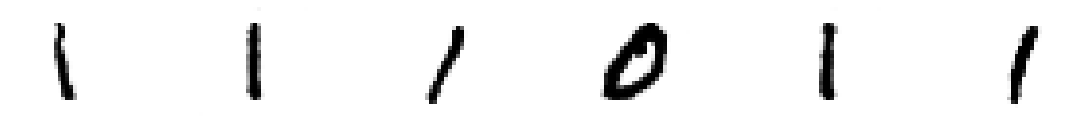

Epoch 79
Loss D: 0.1922575
Loss G: 2.8448462
Epoch 80
Loss D: 0.17808662
Loss G: 2.8174093


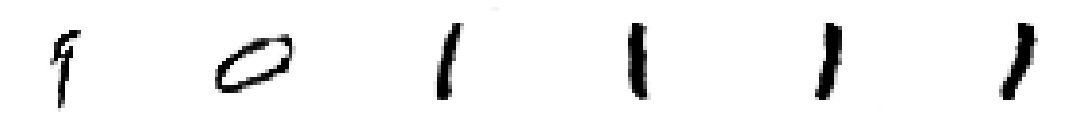

Epoch 81
Loss D: 0.20162717
Loss G: 2.8523886
Epoch 82
Loss D: 0.18329161
Loss G: 2.6398807


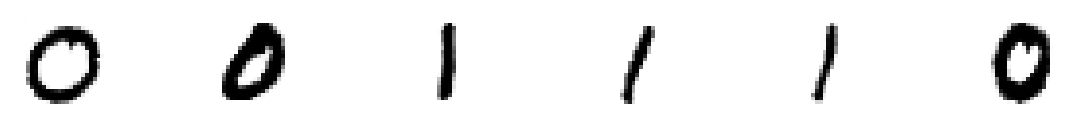

Epoch 83
Loss D: 0.16202185
Loss G: 2.5498574
Epoch 84
Loss D: 0.19483356
Loss G: 2.4174829


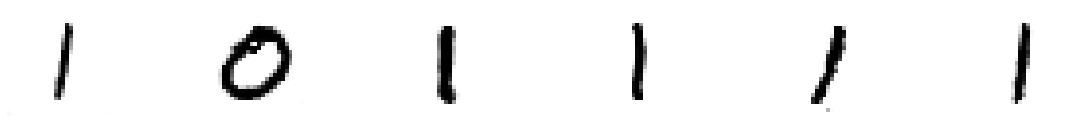

Epoch 85
Loss D: 0.1636137
Loss G: 2.6539888
Epoch 86
Loss D: 0.18453205
Loss G: 2.8141644


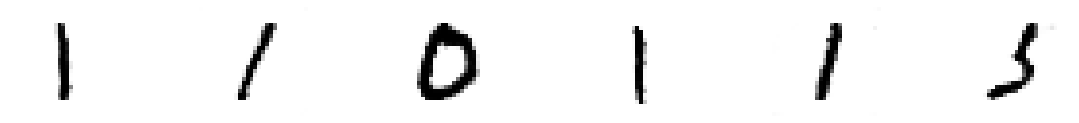

Epoch 87
Loss D: 0.16805695
Loss G: 2.5163977
Epoch 88
Loss D: 0.15849492
Loss G: 2.510147


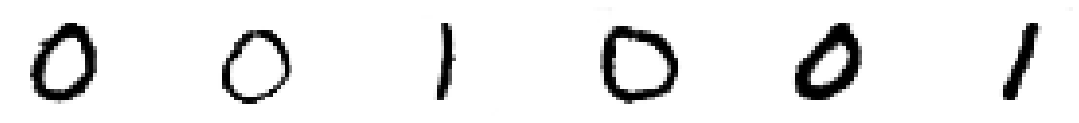

Epoch 89
Loss D: 0.15568861
Loss G: 2.7356918
Epoch 90
Loss D: 0.16254829
Loss G: 2.657379


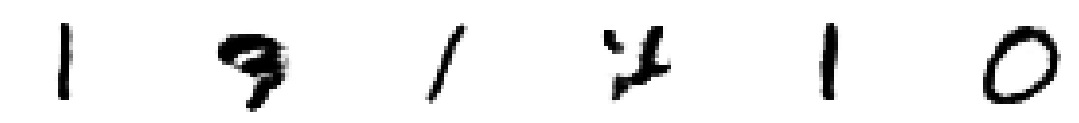

Epoch 91
Loss D: 0.16914272
Loss G: 2.948093
Epoch 92
Loss D: 0.19629261
Loss G: 2.6312082


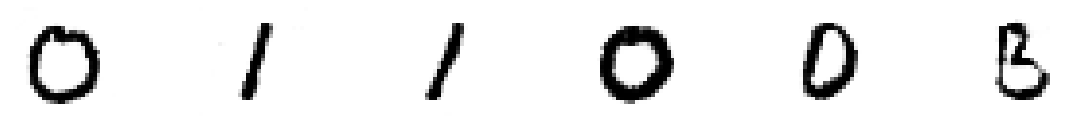

Epoch 93
Loss D: 0.18131119
Loss G: 2.690018
Epoch 94
Loss D: 0.21462071
Loss G: 2.8394492


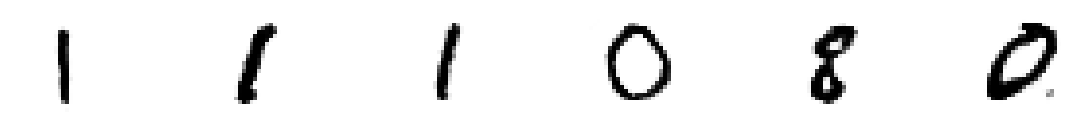

Epoch 95
Loss D: 0.19521269
Loss G: 3.279333
Epoch 96
Loss D: 0.17264044
Loss G: 2.8244898


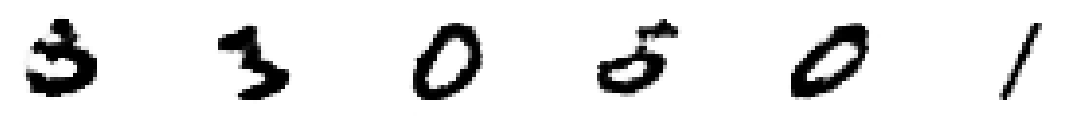

Epoch 97
Loss D: 0.17437825
Loss G: 2.6691592
Epoch 98
Loss D: 0.22288187
Loss G: 2.7620752


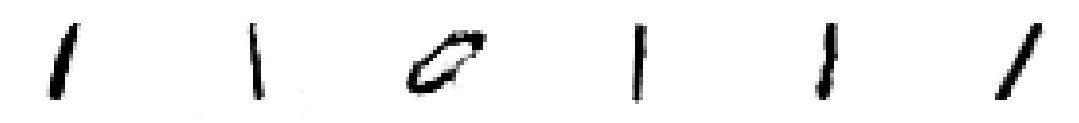

Epoch 99
Loss D: 0.20588547
Loss G: 2.6697836


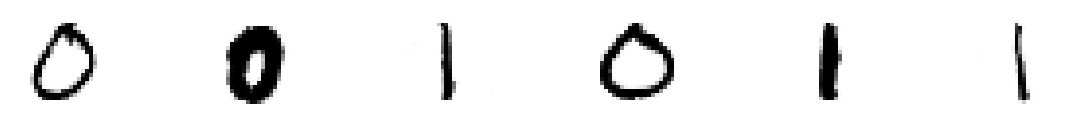

In [7]:
if __name__ == '__main__':
  main()